<a href="https://colab.research.google.com/github/Aper777/Aper/blob/main/IrisSpecies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Task: Classifying Iris Flowers with KNN
In this task, you will work with the classic Iris dataset to perform a classification using the K-Nearest Neighbors (KNN) algorithm. Your goal is to build a model that can accurately predict the species of an iris flower based on its physical measurements.
You can find the dataset on Kaggle: Iris Dataset on Kaggle

In [22]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/iris


1. Load the Dataset
Load: Load the Iris.csv file into your notebook using a data library like Pandas.
Inspect: Display the first few rows of the data to get a feel for its structure. Check the column names, and make sure you understand what each one represents.
Identify: The Species column is our target variable—the thing we want to predict. The other four columns (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) are our features.

In [17]:
df = pd.read_csv(path+'/Iris.csv')
print("First 5 rows:")
print(df.head())
print("\nColumns:", df.columns)
print("\nDataset info:")
print(df.info())

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Columns: Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalW

2. Basic Analysis and Visualization
Descriptive Statistics: Generate and review the summary statistics (mean, standard deviation, etc.) for the numerical feature columns.
Visualization: Create a scatter plot to visualize the relationship between two of the features. For example, a plot of PetalLengthCm vs. PetalWidthCm is often very insightful for this dataset. Use different colors or markers to represent the three different species.

Summary statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


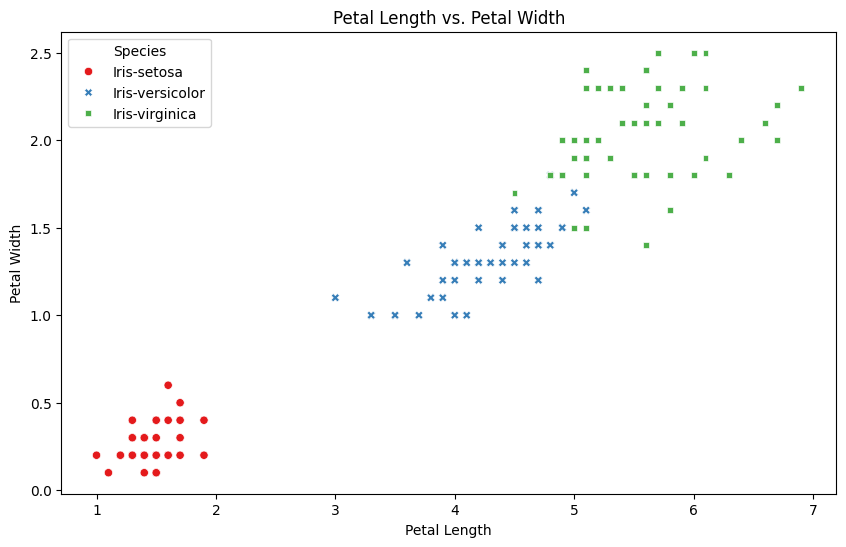

In [18]:
# Descriptive statistics
print("Summary statistics:")
print(df.describe())

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species' , style="Species", palette='Set1')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs. Petal Width')
plt.show()

3. K-Nearest Neighbors Classification
Data Splitting: Separate your dataset into features (X) and the target variable (y). Then, split your data into a training set and a testing set (e.g., a 70/30 split).
Feature Scaling: This is a crucial step! KNN is sensitive to the scale of features. Apply a StandardScaler to your training and testing data to ensure all features contribute equally to the distance calculations.
Model Training:
Initialize the KNN classifier with a starting value for k (e.g., k=5).
Fit the model to your scaled training data.
Prediction and Evaluation:
Use your trained model to make predictions on the scaled testing data.
Evaluate your model's performance using a metric like accuracy score.

In [24]:
# 1. Data Splitting (Տվյալների բաժանում)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Species', axis=1), df['Species'], test_size=0.3, random_state=42)
# 2. Feature Scaling (Չափերի հավասարեցում)
scler = StandardScaler()
X_train_scler = scler.fit_transform(X_train)
X_test_scler = scler.transform(X_test)
# 3. KNN Algorithm (Ինչ է անում KNN–
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scler, y_train)
# 4. Prediction (Կանխատեսում)
y_pred = knn.predict(X_test_scler)
# 5. Evaluation (Որակի ստուգում)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


4.Bonus - Finding the Optimal k: To find the best possible model, you need to find the optimal value for k.
Run the model multiple times with different values of k (e.g., from 1 to 20).
Plot the accuracy score for each value of k.
Identify which value of k gives you the highest accuracy on the testing data.


Best k: 1 with accuracy: 1.0


Text(0.5, 1.0, 'Accuracy vs. Value of k')

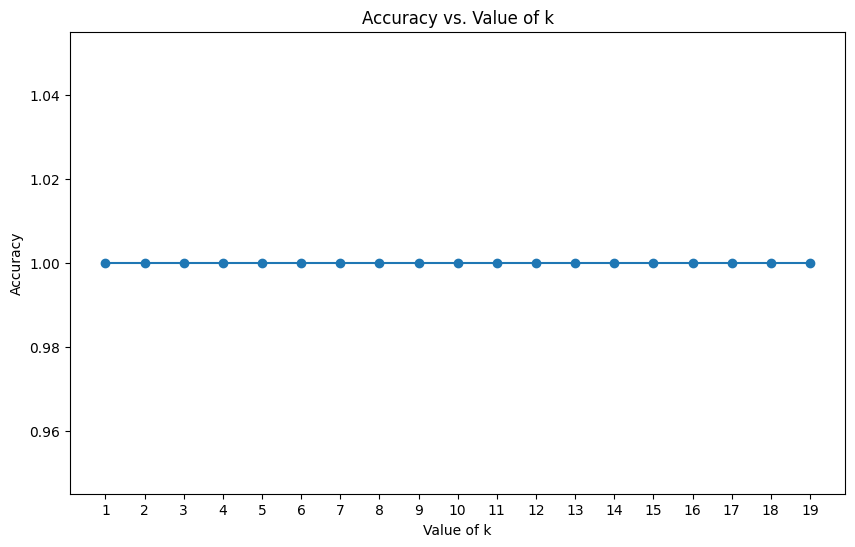

In [29]:
k_values = range(1, 20)
accuracies = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scler, y_train)
  y_pred = knn.predict(X_test_scler)
  acc = accuracy_score(y_test, y_pred)
  accuracies.append(acc)

best_k = k_values[accuracies.index(max(accuracies))]
print("Best k:", best_k, "with accuracy:", max(accuracies))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle="-")
plt.xticks(k_values)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Value of k')